In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
"""
Remember: to do polynomial regression (e.g. y ~ Ax^2 + Bx + C), we just transform the data and apply linear regression.
So for example sample (x_1, x_2) becomes (x_1, x_2, x_1^2, x_1x_2, x_2^2).
Here is the demo using scikit_learn:
"""

poly_f = PolynomialFeatures(2, include_bias=False)

poly_f.fit_transform([
    [2, 3],
    [4, 7],
])

array([[ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  7., 16., 28., 49.]])

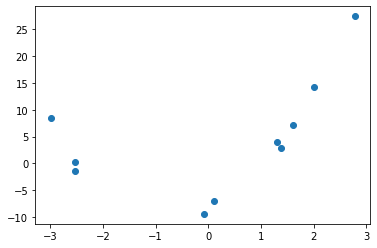

In [3]:
"""
Now let's generate some data.
"""

def gen_data(N):
    """Generates N data points"""
    X = np.random.uniform(-3, 3, size=N)
    Y = 3*X**2 + 4*X - 7 + np.random.normal(size=N)*2
    return np.expand_dims(X, 1), Y

X, Y = gen_data(10)
plt.scatter(X[:,0], Y)

In [4]:
# This is how training data looks like (pairs of input and expected output)
list(zip(X, Y))

[(array([2.00047457]), 14.321242375513618),
 (array([-2.52132529]), -1.368589910224867),
 (array([-2.99313247]), 8.451949904555256),
 (array([1.3749142]), 2.941772796224626),
 (array([-0.08679311]), -9.387389289205208),
 (array([-2.53202199]), 0.2685393862811041),
 (array([1.30552185]), 3.935941888322848),
 (array([1.6074383]), 7.184019103106877),
 (array([2.78450079]), 27.398728957667952),
 (array([0.10879563]), -6.982461874670121)]

train_error 77.89358534794538


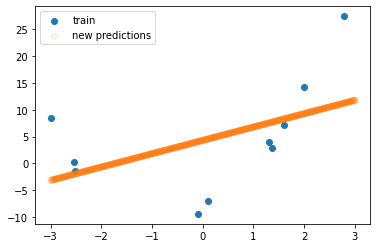

In [5]:
"""Fit the linear model and check the train error, predict for new datapoints"""
clf = LinearRegression()
clf.fit(X, Y)

X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

new_predictions = clf.predict(X_new)

plt.scatter(X, Y, label="train")
plt.scatter(X_new, new_predictions, alpha=0.1, label="new predictions")
plt.legend()

train_error = np.mean((clf.predict(X) - Y)**2)
print("train_error", train_error)

train_error 1.2521467199651426


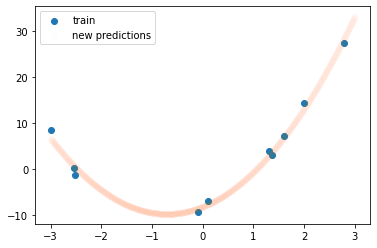

In [6]:
"""Now quadratic model and check the error, predict new"""
quad_features = PolynomialFeatures(2, include_bias=False)

X_quad = quad_features.fit_transform(X)

clf = LinearRegression()
clf.fit(X_quad, Y)

X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

new_predictions = clf.predict(quad_features.transform(X_new))

plt.scatter(X, Y, label="train")
plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
plt.legend()

train_error = np.mean((clf.predict(X_quad) - Y)**2)
print("train_error", train_error)

degree 3


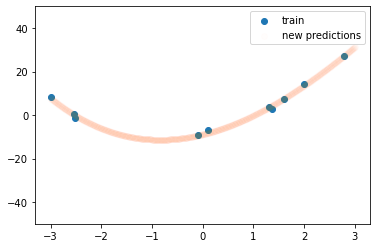

train_error 0.716094288415518
------------------------
degree 4


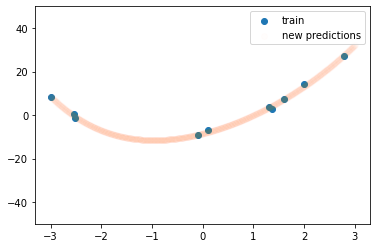

train_error 0.5371906724548486
------------------------
degree 5


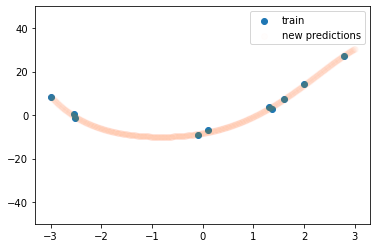

train_error 0.44718064690936793
------------------------
degree 6


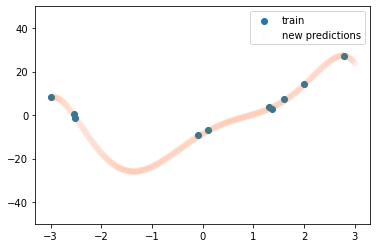

train_error 0.24126116453070795
------------------------
degree 7


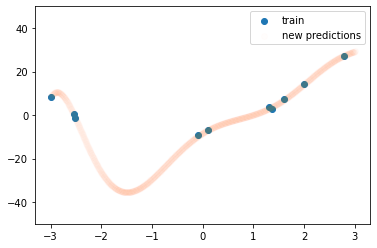

train_error 0.2316978979328479
------------------------
degree 8


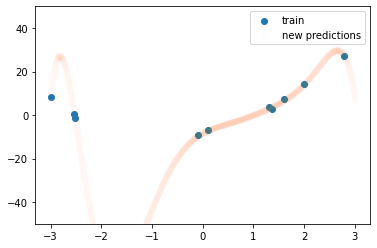

train_error 0.16673084185375348
------------------------
degree 9


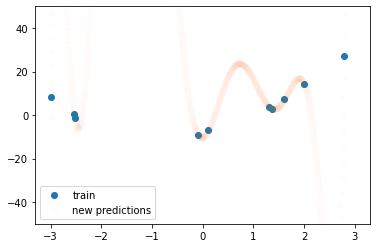

train_error 2.1099763989822522e-19
------------------------


In [7]:
"""Now higher degree models"""
for degree in range(3, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    clf.fit(X_poly, Y)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    print("train_error", train_error)
    print("------------------------")

In [8]:
_= """
Model with higher degree of polynome have smaller training error.
But they predict nonsense.
This is called overfit, we fitted not only relavent stuff from data, but also noise.
Overfited models are useless for prediction on new data.
"""

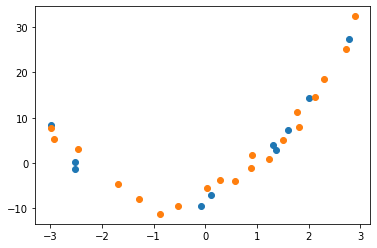

In [9]:
"What we care is about error on new data. Let's have some new data."

X2, Y2 = gen_data(20)
plt.scatter(X, Y)
plt.scatter(X2, Y2)

degree 1


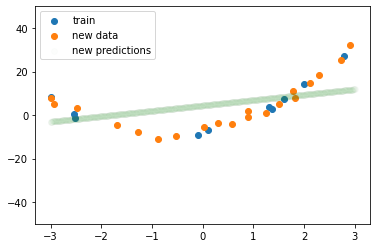

train_error 77.89358534794538 error on new data 89.23184355835761
------------------------
degree 2


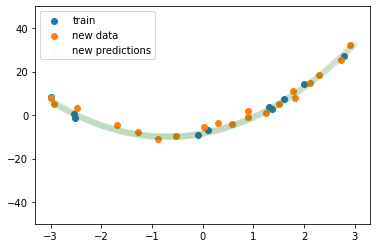

train_error 1.2521467199651426 error on new data 3.134366425019628
------------------------
degree 3


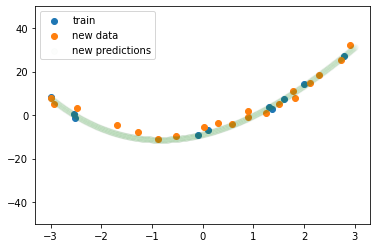

train_error 0.716094288415518 error on new data 4.760103162205527
------------------------
degree 4


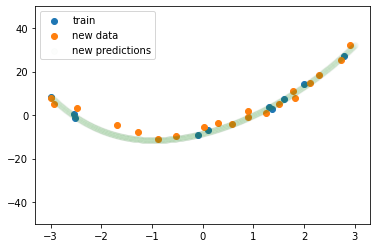

train_error 0.5371906724548486 error on new data 5.030316535543138
------------------------
degree 5


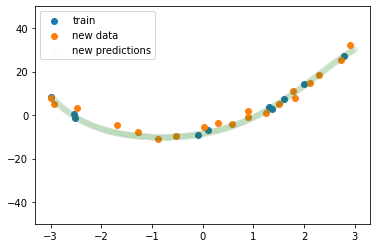

train_error 0.44718064690936793 error on new data 4.783459475756854
------------------------
degree 6


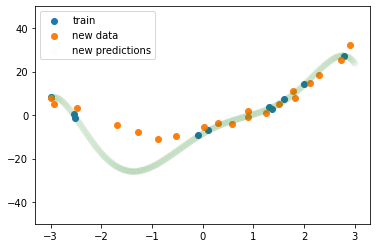

train_error 0.24126116453070795 error on new data 47.58161253327954
------------------------
degree 7


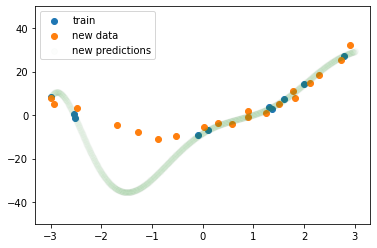

train_error 0.2316978979328479 error on new data 99.06026124546706
------------------------
degree 8


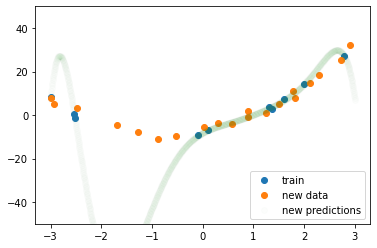

train_error 0.16673084185375348 error on new data 434.0723387630308
------------------------
degree 9


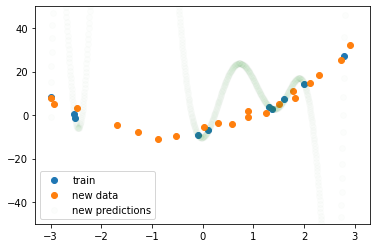

train_error 2.1099763989822522e-19 error on new data 19604.40013652103
------------------------


In [11]:
"""Now let's do the same, but also check error on new data."""
train_errors = []
new_data_errors = []

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    clf.fit(X_poly, Y)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error", train_error, "error on new data", new_data_error)
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

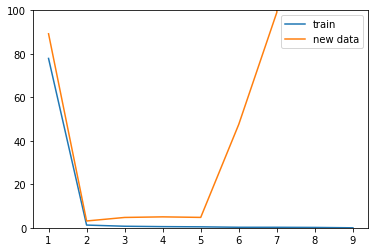

In [12]:
"""Let's plot errors vs degree"""
plt.plot(list(range(1, 10)), train_errors, label="train")
plt.plot(list(range(1, 10)), new_data_errors, label="new data")
plt.ylim(0, 100)
plt.legend()

In [13]:
_ = """
What we really want is that model works on the new data. Thus degree 2 in the best in current example.

In reality: Somebody gives you 10000s of data points.
You should build a model with them, but also pick the best model.
We will split data into 3 groups:
- train - this goes into fit function, X in case above
- valid - used to select best model and hyperparameters (i.e. degree of polynomial)
- test - to report final performance

How sizes affect things:
- Bigger train set - more precise model (model fits less noise)
- Bigger valid/test set - we can trust the error more, more precise evaluation
  - Rigorous error should be: (mean +- inter), bigger test set makes inter smaller
"""

degree 1


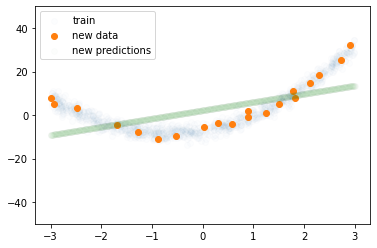

train_error 71.74777686257724 error on new data 85.19789518242047
------------------------
degree 2


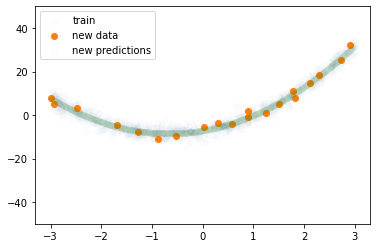

train_error 4.233489097845295 error on new data 2.445140069629635
------------------------
degree 3


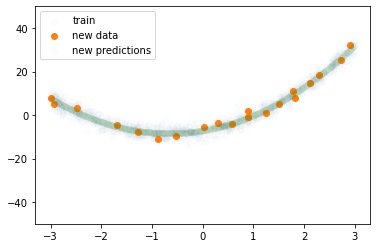

train_error 4.2307161216805556 error on new data 2.43467969382325
------------------------
degree 4


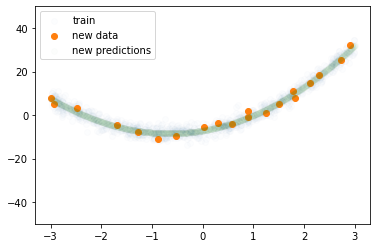

train_error 4.230136476988735 error on new data 2.4445483547694686
------------------------
degree 5


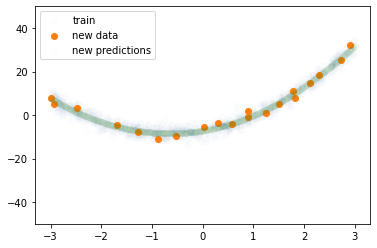

train_error 4.2251857767320224 error on new data 2.578875211097231
------------------------
degree 6


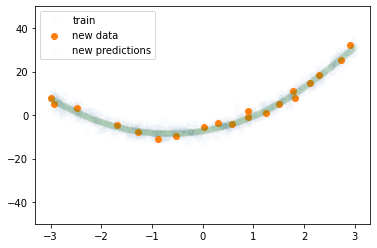

train_error 4.221702376638797 error on new data 2.545021933320938
------------------------
degree 7


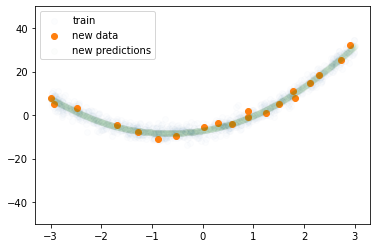

train_error 4.219656034829613 error on new data 2.5531592464239843
------------------------
degree 8


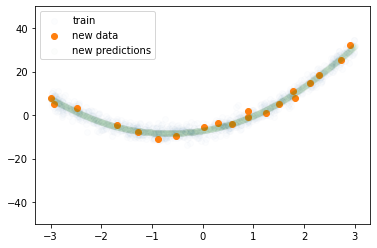

train_error 4.219601248888095 error on new data 2.5490126767678234
------------------------
degree 9


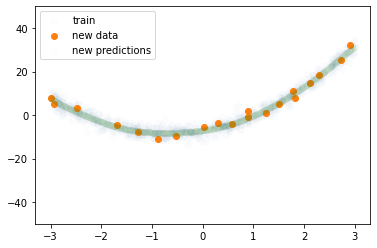

train_error 4.210658756360171 error on new data 2.65305954274361
------------------------


In [14]:
"""Now let's do the same, but also check error on new data and have big train set."""
train_errors = []
new_data_errors = []
Xbig, Ybig = gen_data(1000)

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(Xbig)

    clf = LinearRegression()
    clf.fit(X_poly, Ybig)

    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(Xbig, Ybig, label="train", alpha=0.01)
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Ybig)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error", train_error, "error on new data", new_data_error)
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

degree 1


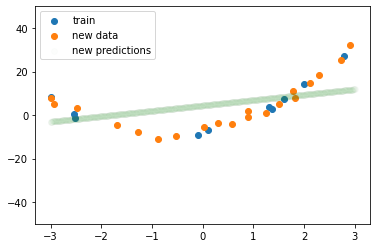

train_error on full data 77.89358534794538 error on new data 89.23184355835761 cross val error 117.62810523800108
------------------------
degree 2


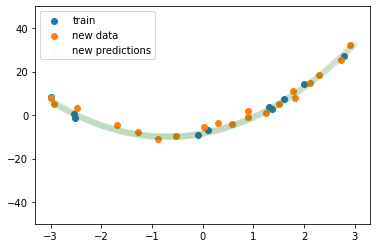

train_error on full data 1.2521467199651426 error on new data 3.134366425019628 cross val error 4.81598712353977
------------------------
degree 3


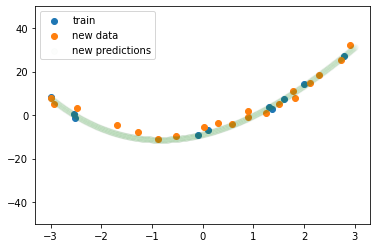

train_error on full data 0.716094288415518 error on new data 4.760103162205527 cross val error 1.7163720579820159
------------------------
degree 4


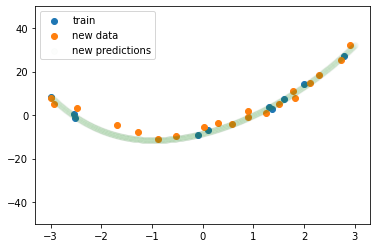

train_error on full data 0.5371906724548486 error on new data 5.030316535543138 cross val error 4.834576093836014
------------------------
degree 5


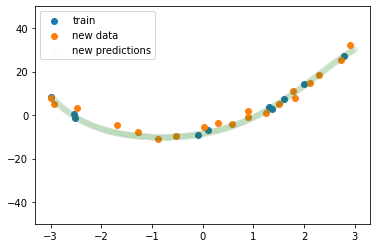

train_error on full data 0.44718064690936793 error on new data 4.783459475756854 cross val error 809.1791891945393
------------------------
degree 6


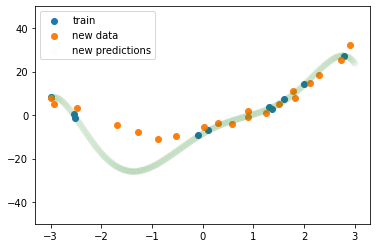

train_error on full data 0.24126116453070795 error on new data 47.58161253327954 cross val error 6031.791036519602
------------------------
degree 7


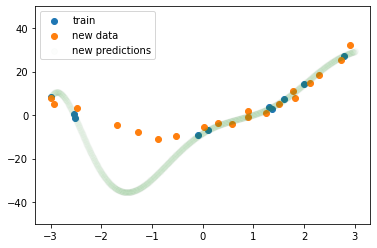

train_error on full data 0.2316978979328479 error on new data 99.06026124546706 cross val error 98582.88340728133
------------------------
degree 8


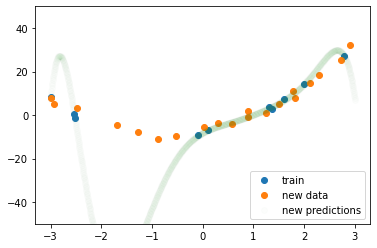

train_error on full data 0.16673084185375348 error on new data 434.0723387630308 cross val error 344454.09525620815
------------------------
degree 9


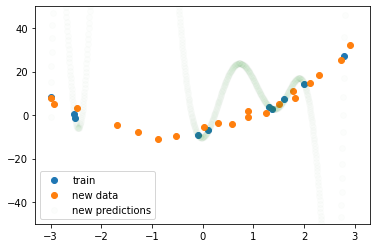

train_error on full data 2.1099763989822522e-19 error on new data 19604.40013652103 cross val error 895384.9010359121
------------------------


In [15]:
"""
One more problem.
What if we have very small dataset, e.g. 100 points.
After split we get:
 - train 80 samples
 - valid 10 samples
 - test 10 samples

This is bad.

This can be saved by crossvalidation, do train/test and instead of valid do crossvalidation as in
https://scikit-learn.org/stable/modules/cross_validation.html
Split data into K parts. Train K-times always evaluate on different part.
"""

"""Now let's do the same, but also check error on new data, and also cross val score"""
from sklearn.model_selection import cross_val_score

train_errors = []
new_data_errors = []

for degree in range(1, 10):
    print("degree", degree)
    poly_features = PolynomialFeatures(degree, include_bias=False)

    X_poly = poly_features.fit_transform(X)

    clf = LinearRegression()
    #clf.fit(X_poly, Y)
    score = cross_val_score(clf, X_poly, Y, cv=5, scoring="neg_mean_squared_error")

    clf.fit(X_poly, Y)
    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)

    new_predictions = clf.predict(poly_features.transform(X_new))

    plt.scatter(X, Y, label="train")
    plt.scatter(X2, Y2, label="new data")
    plt.scatter(X_new, new_predictions, alpha=0.01, label="new predictions")
    plt.legend()
    plt.ylim(-50, 50)
    plt.show()

    train_error = np.mean((clf.predict(X_poly) - Y)**2)
    new_data_error = np.mean((clf.predict(poly_features.transform(X2)) - Y2)**2)
    print("train_error on full data", train_error, "error on new data", new_data_error, "cross val error", -np.mean(score))
    print("------------------------")
    train_errors.append(train_error)
    new_data_errors.append(new_data_error)

degree 1


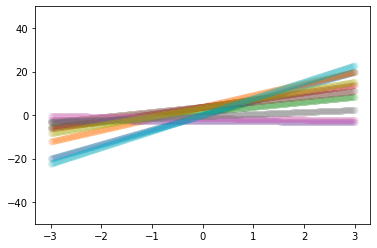

degree 2


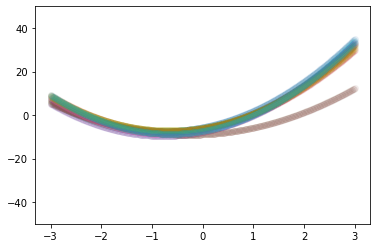

degree 4


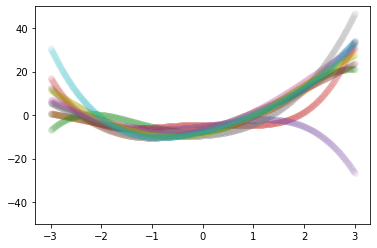

degree 9


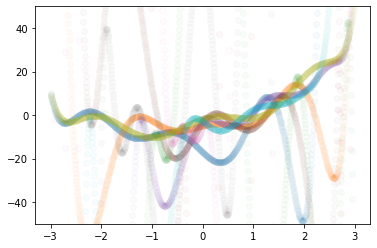

In [16]:
"""
Test error can be decompsoded into bias and variance:
Bias - what model cannot predict (e.g. linear model on quadratic data)
Variance - if I repeat training on new data, how different model I will get

Small degree - high bias, low variance
High degree - low bias, high variance
"""

"""Lets train 10 models on different data"""

for degree in [1, 2, 4, 9]:
    print("degree", degree)
    X_new = np.expand_dims(np.linspace(3, -3, 1000), 1)
    for _ in range(10):
        X, Y = gen_data(10)
        poly_features = PolynomialFeatures(degree, include_bias=False)

        X_poly = poly_features.fit_transform(X)

        clf = LinearRegression()
        clf.fit(X_poly, Y)

        new_predictions = clf.predict(poly_features.transform(X_new))

        #plt.scatter(X, Y, label="train")
        plt.scatter(X_new, new_predictions, alpha=0.03)

    plt.ylim(-50, 50)
    plt.show()